In [ ]:
# ARIMA
'''
Autoregressive Integrated Moving Average의 약자로,
Autoregressive는 자기 회귀모형을 의미하고,
Moving Average는 이동평균모형을 의미한다

ARIMA는 자기회귀와 이동평군을 둘 다 고려하는 모형인데,
ARMA와 ARIMA의 차이점은 ARIMA의 경우 시계열의 비정상성(Non-stationary)을
설명하기 위해 관측치 간의 차분(Diffrance)을 사용한다는 것이다

AR : 자기회귀(Autoregression). 이전 관측값의 오차항이 이후 관측값에 영향을
     주는 모형이다.
     기본 AR(1)식 -> X(t) = (theta)*X(t-1)+epsilon(t)
     theta는 자기상관계수, epsilon은 white noise, Time lag는 1이상
I : Integrated. 누적을 의미하는 것으로, 차분을 이용하는 시계열모형들에 붙이는
    표현이다.
MA : 이동평균(Moving Average). 관측값이 이전의 연속적인 오차항의 영향을 받는
     모형이다.
     기본 MA(1)식 -> X(t) = epsilon(t) - beta(1)*epsilon(t-1)
     epsilon은 t시점의 오차항, beta는 이동평균계수

현실에 존재하는 시계열자료는 불안정(Non-stationary)한 경우가 많다
그런데 AR(p), MA(q) 모형이나, 이 둘을 합한 ARMA(p,q)모형으로는
이러한 불안정성을 설명할 수 없다
따라서 모형 그 자체에 이러한 비정상성을 제거하는 과정을 포함한 것이
ARIMA모형이며 ARIMA(p, d, q)로 표현한다

AR(p) = ARIMA(p, 0, 0)
MA(q) = ARIMA(0, 0, q)
ARMA(p,q) = ARIMA(p, 0, q)
'''

In [ ]:
# ARIMA hyperparameter
'''
ARIMA의 hyperparameter는 크게 3가지이다
AR모형의 Lag를 의미하는 p, MA모형의 Lag를 의미하는 q,
차분(Diffrence) 횟수를 의미하는 d
보통 p,d,q 순서로 쓰며, 통상적으로 p+q<2, p*q=0인 값들을 많이 사용한다

여기서 p*q=0이라 하면, 두 값 중 하나는 0이라는 것인데,
ARIMA는 AR모형과 MA모형을 하나로 합친 것이지만 실제로 대부분의 시계열
자료에서는 하나의 경향만을 강하게 띄기 때문에 이렇게 사용하는 것이
더 잘 맞는다고 한다

p,d,q를 정하는 방법
-> 경험적으로 찾을 수 있지만, ACF plot과 PACF plot을 이용해서
   AR과 MA의 모수를 추정할 수 있다
-> ACF(Autocorrelation function) : Lag에 따른 관측치들 사이의 관련성을
   측정하는 함수
-> PACF(Parial autocorrelation function) : k 이외의 모든 다른 시점 관측치의
   영향력을 배제하고 y(t)와 y(t-k) 두 관측치의 관련성을 측정하는 함수
시계열 데이터가 AR의 특성을 띄는 경우, ACF는 천천히 감소하고
PACF는 처음 시차를 제외하고 급격히 감소한다.
반대로 MA의 특성을 띄는 경우, ACF는 급격히 감소하고 PACF는 천천히 감소한다
급격히 감소하는 시차를 각 AR과 MA모형의 모수(p,q)로 사용할 수 있다
또한, 데이터를 차분하여 ACF 및 PACF를 계산함으로써 적절한 차분횟수까지
구할 수 있다
'''

In [32]:
import pandas as pd
import re
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [26]:
samsung = pd.read_csv('samsung.csv')
samsung = samsung[::-1]
samsung = samsung.drop(['시가','고가','저가','거래량'], axis=1)
samsung['종가'] = samsung['종가'].map(lambda x: int(re.sub(r',', '', x)))
samsung = samsung.iloc[-50:, :]
samsung.reset_index(drop=True, inplace=True)
samsung.columns = ['date', 'close']
samsung

,date,close
0,2020-06-25,51900
1,2020-06-26,53300
2,2020-06-29,52400
3,2020-06-30,52800
4,2020-07-01,52600
5,2020-07-02,52900
6,2020-07-03,53600
7,2020-07-06,55000
8,2020-07-07,53400
9,2020-07-08,53000


In [27]:
samsung['date'] = pd.to_datetime(samsung.date, format='%Y-%m-%d')
samsung = samsung.set_index('date')
print(samsung.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2020-06-25 to 2020-09-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   close   50 non-null     int64
dtypes: int64(1)
memory usage: 800.0 bytes
None


<AxesSubplot:xlabel='date'>

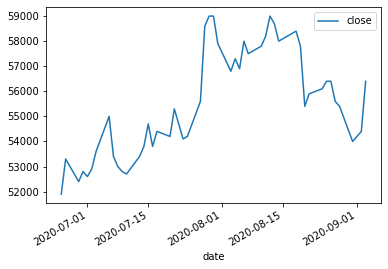

In [28]:
samsung.plot()

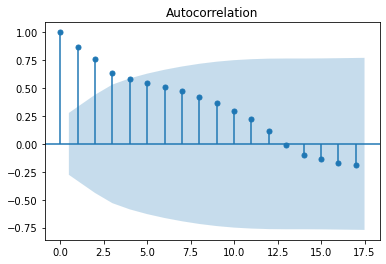

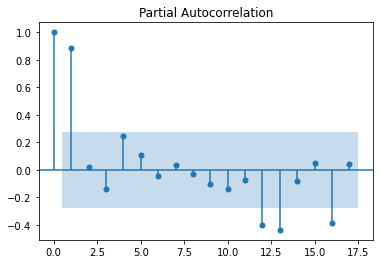

In [33]:
plot_acf(samsung)
plot_pacf(samsung)
plt.show()

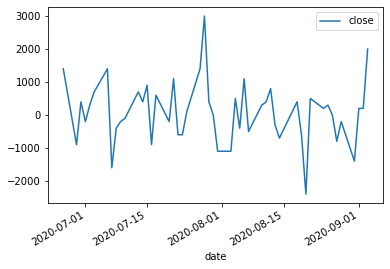

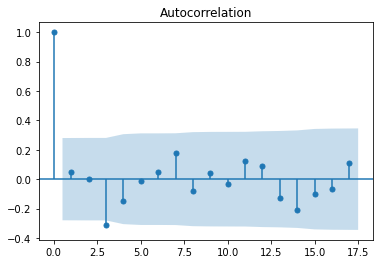

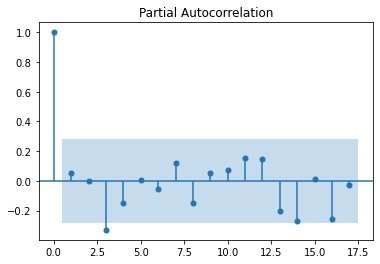

In [35]:
'''
ACF를 보면 12.5의 Time lag를 기준으로 자기상관이 양에서 음으로 변동한다
PACF는 약 1의 Time lag에서 약 0.9를 보이고 이후에 급격히 감소한다
따라서 p=0, q=1이 적당하다고 추측할 수 있다

적절한 차분 차수의 계산을 위해 우선 1차 차분을 하고, ACF와 PACF를 다시 계산한다
'''
diff_1 = samsung.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [36]:
'''
차분 이후의 ACF와 PACF를 보니, 시계열이 정상상태(Stationary)를 보이는 것으로
생각되므로, 1차 차분만으로 충분할 것으로 판단된다
따라서 본 데이터는 ARIMA(0,1,1)을 사용한다
'''
model = ARIMA(samsung, order=(0,1,1)) # freq='D'
model_fit = model.fit(trend='c', full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                   49
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -404.594
Method:                       css-mle   S.D. of innovations            932.665
Date:                Tue, 08 Sep 2020   AIC                            815.187
Time:                        18:24:49   BIC                            820.863
Sample:                             1   HQIC                           817.340
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            95.3278    140.406      0.679      0.497    -179.862     370.518
ma.L1.D.close     0.0523      0.144      0.363      0.717      -0.230       0.335
                                    Root

c:\users\ilifo-028\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ilifo-028\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [37]:
'''
'P>z'값이 일반적으로 학습의 적정성을 위해 확인하는 t-test값이다
즉, p-value 0.05 수준에서 보면 MA(1)의 계수와 모형의 Constant는 유효하지 않다
따라서, 위 코드에서 model.fit()의 파라미터 중 trend='c'가 아니라 'nc'로
설정해주어야 한다
'''
model = ARIMA(samsung, order=(0,1,1)) # freq='D'
model_fit = model.fit(trend='nc', full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                   49
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -404.824
Method:                       css-mle   S.D. of innovations            937.057
Date:                Tue, 08 Sep 2020   AIC                            813.648
Time:                        18:28:27   BIC                            817.432
Sample:                             1   HQIC                           815.083
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ma.L1.D.close     0.0545      0.144      0.378      0.705      -0.228       0.337
                                    Roots                                    
                  Real          Imaginary   

c:\users\ilifo-028\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ilifo-028\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [47]:
# ADF(Augmented Dickey-Fuller) 검정
from statsmodels.tsa.stattools import adfuller
y = samsung['close']
y_1diff = samsung.diff().dropna()['close']
y_2diff = samsung.diff(2).dropna()['close']
result = adfuller(y)
print(f'원 데이터 ADF Statistic : {result[0] : .4f}')
print(f'원 데이터 p-value : {result[1] : .4f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic : {result[0] : .4f}')
print(f'1차 차분 p-value : {result[1] : .4f}')
result = adfuller(y_2diff)
print(f'2차 차분 ADF Statistic : {result[0] : .4f}')
print(f'2차 차분 p-value : {result[1] : .4f}')

원 데이터 ADF Statistic : -2.0394
원 데이터 p-value :  0.2696
1차 차분 ADF Statistic : -4.9872
1차 차분 p-value :  0.0000
2차 차분 ADF Statistic : -5.8239
2차 차분 p-value :  0.0000


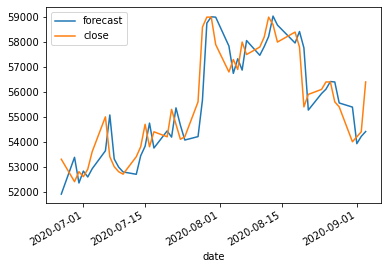

In [39]:
# prediction
model_fit.plot_predict()
plt.show()

In [40]:
preds = model_fit.forecast(steps=1)
print(preds)
# predict_value, stderr, upper bound, lower bound

(array([56508.39827799]), array([937.05700959]), array([[54671.80028773, 58344.99626825]]))


In [ ]:
'''
최근 딥러닝, 인공지능 등의 트렌드와 함께 시계열분석에도 인공신경망이 널리
사용되고 있다
특히 시계열분석에는 RNN, LSTM 등을 이용할 수 있지만, 신경망 모델의 가장 큰
단점은 아직 제대로 된 모형 해석이 거의 안된다는 점이다
알고리즘적인 측면에서야 성능이 잘 나오면 되는거지만 데이터과학, 특히 의사결정
지원 시스템(Decision support system)에서는 최종 결정권자는 사람이기에 모형이
그렇게 예측한 근거가 필요하다
이러한 관점에서 보았을 때, AR, MA등과 같은 고전적인 통계기반의 시계열분석법이
아직은 조금 더 우위에 있지 않나 싶다
'''